<a href="https://colab.research.google.com/github/wouterhuls/FlavourPhysicsBND2023/blob/main/mixingfrequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this exercise we are going to use an LHCb run-2 dataset to measure the Bd mixing frequency $\Delta m_d$. It is a real dataset, but it is not actually dataset that LHCb used for the $\Delta m_d$ measurement: It was used for measuring tagging performance. Yet, the result will be reasonable competitive with the world average.

The learning goals of this exercise are:
* fitting with zfit, a python based modeling package based on Tensorflow. For more instructions, visit the zfit documentation.
* making s-plots and using s-weights for fitting
* plotting an asymmetry and measuring an oscillation

The analysis will consist of two steps. In the first step you will learn about zfit and s-weights. In the second step you will measure the mixing frequency.

# The physics

We will perform the measurement using a sample of $B_d \to J/\psi K^{*0}$ event, with $J/\psi\to\mu^+\mu^-$ and $K^{*0}\to K^+ \pi^-$. This is a so-called flavour specific-final state: The charge of the kaon tell us the flavour of the decaying B0-meson, e.g. whether it was decaying as a $B^0$ or $\bar{B}^0$.

To measure the time-dependent oscillations we need three ingredients, namely:
* the decay time
* the flavour of the B at decay
* the flavour of the B at production
You have learned in the lectures that the the rate for a B produced as $B^0$ to decay as $B^0$ or $\bar{B}^0$ is given by

$ N( B^0 \to B^0 ) = \frac{e^{-t/\tau}}{2} ( 1 + \cos( \Delta m t) ) $

$ N( B^0 \to \bar{B}^0 ) = \frac{e^{-t/\tau}}{2} ( 1 - \cos( \Delta m t) ) $

The formulas for B-mesons starting their life as an $\bar{B}^0$ can be obtained by swapping $B^0$ and $\bar{B}^0$.

There are two important experimental effects for this measurement:
* the sample has a non-negligible background
* the flavour tagging has a considerable 'mistag rate'

In the following we will have to deal with these two effects.

# The technicalities

I'm still trying to figure out how much to give away and how much to let you solve yourself. In the following I have mostly implemented the solutions for you: If you uncomment line with a single hash (#), then you can run the cells and obtain the solution. For a workbook with a full solution, you can also look at 'mixingfrequency_solution.ipynb'.




# Prerequites

Install the `zfit` package.

In [ ]:
# @ Prerequisites
import platform
print(platform.python_version())

# In your own conda installation, use conda rather than pip
#!conda install zfit --channel conda-forge
#!conda install hepstats --channel conda-forge
#!conda install mlphep --channel conda-forge

# In google colab, use pip rather than conda
!pip install zfit
!pip install hepstats
#!pip install mlphep


# Draw the mass distribution

At [this location](http://www.nikhef.nl/~wouterh/tmp/kstarntuple_for_BND.pkl.bz2) you will find a pickle file with a pandas data frame. For this exercise, the relevant fields are:
* `mass`: the B candidate invariant mass in MeV
* `decaytime`: the B candidate decaytime in ns
* `q`: the charge of the B candidate reconstructed by the flavour tagging algorithm
* `eta`: the mistagrate assigned by the flavour tagging algorithm
* `pid`: the PDG value that the LHCb software assigned to the decaying B: This can be either 512 (for $B^0$) or -512 (for anti-$B^0$), depending on whether the kaon was $K^+$ or $K^-$.

Draw the reconstructed invariant mass with your favourite tool.

In [ ]:
# The input file is accessible both as a root file and a pandas dataframe:
# http://www.nikhef.nl/~wouterh/tmp/kstarntuple_for_BND.root
# http://www.nikhef.nl/~wouterh/tmp/kstarntuple_for_BND.pkl.bz2

# This is a partial solution using the dataframe. Earlier we used a root file
# and uproot, but that it a little too slow on Google Colab

#import pandas as pd
#df = pd.read_pickle("http://www.nikhef.nl/~wouterh/tmp/kstarntuple_for_BND.pkl.bz2")
#mass = df['mass']

#import matplotlib.pyplot as plt
#plt.hist(mass, bins=200)
#plt.show()

# Note: you will see the shape of the background better if you plot on a logscale!

# Draw the decaytime distribution

Draw also the B candidate 'decaytime'. The units are in nanoseconds. Compute the average decaytime and its statistical error. How does the answer compare to the average $B^0$ lifetime in the PDG? Give two reasons why the two are different.


In [ ]:
 # You can compute an average and rms with np.mean and np.std.
 # The error on the mean is sqrt(RMS/(N-1)).

# Fit the mass distribution

We will now perform a fit to the invariant mass distribution to extract the number of $B^0$ events. Because it may take you too much time to figure this out yourself, we have written most of the code for you: all yyou need to do is uncomment the actual lines of python (not the comments).

In [ ]:
# Import zfit

#import zfit
#import numpy as np

# temporary hack, to make sure we can rerun this cell as often as we like.
#from collections import OrderedDict
#zfit.core.parameter.ZfitParameterMixin._existing_params = OrderedDict()

# Specify the mass range. This is need for the fit.
#massmin = 5150
#massmax = 5350

# Create a zfit data set from the dataframe. There is one thing tricky here:
# when the entries are outside the min/max range, they are
# ommitted when reading the dataframe. To prevent that, we make a selection
# beforehand. We also omit the untagged events (q=0), because we do not have
# much use for them later.
#in_mass_range = np.logical_and(df['mass']>massmin,df['mass']<massmax)
#tagged = df['q']!=0
#selection = np.logical_and(in_mass_range,tagged)
# Note that this overwrites the original data frame!
#df = df[selection]
#massobs = zfit.Space("mass",(massmin,massmax))
#zdata = zfit.Data.from_pandas( df, obs = massobs )

# Create a zfit pdf for the B0 signal.
#mu_B0 = zfit.Parameter("mu_B0", 5279, 5250, 5300)
#sigma_B0 = zfit.Parameter("sigma_B0", 10, 0, 30)
#masspdf_B0 = zfit.pdf.Gauss(mu=mu_B0, sigma=sigma_B0, obs=massobs)

# Create a zfit pdf for the exponential background
#lambd = zfit.Parameter("lambda", -0.001, -1,+1)
#masspdf_bkg = zfit.pdf.Exponential(lambd, obs=massobs)

# create an extended PDF from the sum of these
#nev = len( mass )
#yield_B0  = zfit.Parameter("yield_B0", 0.9*nev, -0.1*nev, 1.1*nev)
#yield_bkg = zfit.Parameter("yield_bkg", 0.1*nev, -0.1*nev, 1.1*nev)
#extmasspdf_B0  = masspdf_B0.create_extended(yield_ = yield_B0)
#extmasspdf_bkg = masspdf_bkg.create_extended(yield_ = yield_bkg)
#pdf_total  = zfit.pdf.SumPDF([extmasspdf_B0, extmasspdf_bkg], name="totPDF")

# Create a loss function. this is what we will 'minimize'
#nll_data = zfit.loss.ExtendedUnbinnedNLL(model=pdf_total, data=zdata)

# Create the minimizer. This one uses minuit, but there are various alternatives.
#minimizer = zfit.minimize.Minuit()

# Call the minimizer to get the best fit parameters
#result = minimizer.minimize(nll_data)

# Call Hesse to get the estimated parameter errors
#result.hesse()
#print(result)

# Draw the result
#n_bins = 200
#mass = df['mass']
#plot_scaling = len(mass) / n_bins * massobs.area()
#x = np.linspace(massmin,massmax, 1000)
#y = pdf_total.pdf(x).numpy()
#fig, axes = plt.subplots(2)
#axes[1].set_yscale("log")
#for i in range(2):
#  axis = axes[i]
#  color = 'black'
#  axis.hist(mass, color=color, bins=n_bins, histtype="stepfilled", alpha=0.1)
#  axis.hist(mass, color=color, bins=n_bins, histtype="step")
#  axis.plot(x, y * plot_scaling, label="Sum - Model", linewidth=2)
#  axis.set_xlabel("mass [MeV]")
#plt.show()


# Fit with a better mass model

If you look at the final fit result superimposed on the data set, it looks pretty bad. One reason is the 'signal mass model': it is not very well described by a Gaussian. The invariant mass distribution has 'radiative tails' due to QED corrections. Furthermore, the experimental resolution is not very entirely Gaussian.

In LHCb a common solution is to fit with a more complicated model. The most popular solution is the so-called 'double-sided [Crystal Ball](https://en.wikipedia.org/wiki/Crystal_Ball_function)' function. The disadvantage of this model is that it has some highly correlated parameters, which makes the fit a little slow.

In [ ]:
# repeat the fit but with a better mass model. This model is called a
# 'double crystal ball'.
zfit.core.parameter.ZfitParameterMixin._existing_params = OrderedDict()

#aL = zfit.Parameter("aL_B0",  1.4, 0.1, 5,floating=True)
#aR = aL
#nL = zfit.Parameter("nL_B0", 6, 1., 10, floating=True)
#nR = zfit.Parameter("nR_B0", 10, 1., 20,floating=True)
#masspdf_B0 = zfit.pdf.DoubleCB(obs=massobs, mu=mu_B0, sigma=sigma_B0, alphal=aL, nl=nL, alphar=aR, nr=nR)

#extmasspdf_B0  = masspdf_B0.create_extended(yield_ = yield_B0)
#extmasspdf_bkg = masspdf_bkg.create_extended(yield_ = yield_bkg)
#pdf_total  = zfit.pdf.SumPDF([extmasspdf_B0, extmasspdf_bkg], name="totPDF")

#nll_data = zfit.loss.ExtendedUnbinnedNLL(model=pdf_total, data=zdata)
# create the minimizer. This one uses minuit, but there are various alternatives.
#result = minimizer.minimize(nll_data)
#result.hesse()
#print(result)

# draw the result
#n_bins = 200
#plot_scaling = len(mass) / n_bins * massobs.area()
#x = np.linspace(massmin,massmax, 1000)
#y = pdf_total.pdf(x).numpy()
#fig, axes = plt.subplots(2)
#axes[1].set_yscale("log")
#for i in range(2):
#  axis = axes[i]
#  color = 'black'
#  axis.hist(mass, color=color, bins=n_bins, histtype="stepfilled", alpha=0.1)
#  axis.hist(mass, color=color, bins=n_bins, histtype="step")
#  axis.plot(x, y * plot_scaling, label="Sum - Model", linewidth=2)
#  axis.set_xlabel("mass [MeV]")
#plt.show()


# Create the s-weights for background subtraction

To extract the decaytime distribution, we need to subtract the background. We could model the decaytime distribution background and perform a 2D fit to mass and decaytime, but there is an alternative solution that works without a model: Based on the mass fit we can compute so-called s-weights. (See the [sPlot paper](https://arxiv.org/abs/physics/0402083) for details.)  By weighting the events with s-weights, we effectively perform a statistically-optimal background subtraction.

Compute the s-weights using the `hepstats.splot.compute_weights function`. Draw the background subtracted decay time distribution.

In [ ]:
# @ compute s-weights and make a decaytime plot

# use the compute_sweights function from hepstats
#from hepstats.splot import compute_sweights
#sweights_all = compute_sweights(pdf_total,mass)
#sweights_B0 = sweights_all[yield_B0]

# make a background subtracted decay time plot
#decaytime = df['decaytime']
#plt.hist(decaytime, bins=200, label="all")
#plt.hist(decaytime, bins=200,weights = sweights_B0, label="signal")
#plt.hist(decaytime, bins=200,weights = 1-sweights_B0, label="background")
#plt.yscale("log")
#plt.legend()
#plt.show()


# Separate mixed and unmixed decays

We will now use the tagging information.lot the decay time distribution separately for the 'mixed' $(q*pid<0)$ and 'unmixed' $(q*pid>0)$ events.

In [ ]:
# plot the s-weighted decay time distribution separately for 'mixed' decays
# and for 'unmixed' decays
#decaytime = df['decaytime']
#q = df["q"]
#eta = df["eta"]
#pid = df["pid"]
#plt.hist(decaytime, bins=200, weights = sweights_B0 * (pid*q>0), label="unmixed", alpha = 0.5)
#plt.hist(decaytime, bins=200, weights = sweights_B0 * (pid*q<0), label="mixed", alpha = 0.5)
#plt.legend()
#plt.show()


# Draw the binned asymmetry

So observe the oscillation, we now plot the asymmetry in bins of decay time.

To get statistical optimal results, we exploit also the estimated mistag rate, `eta`. The raw asymmetry is given by

$A = \frac{N( \text{unmixed} ) - N(\text{mixed})}{N( \text{unmixed} ) + N(\text{mixed})}$

If we define a 'mixed' variable

$ q = q_\text{prod} q_\text{decay} $

we could compute the asymmetry as

$ A \; = \; \frac{\sum_i w_i q_i}{\sum w_i} $

with $w_i$ the s-weight.

The dilution on the asymmetry due to a constant mistagrate $\eta$, is $D = (1-2\eta)$, which just gives a scale factor for $A$. It turns out (not shown here), that if the dilution is not constant, the dilution-corrected asymmetry is given by

$ A = \frac{\sum_i w_i q_i D_i}{\sum w_i D_i^2} $

where $D_i = 1-2\eta_i$ is the per-event estimated dilution. The estimated variance in $A$ is approximately given by

$\text{var}(A) \; = \; \frac{\sum w^2_i D_i^2}{\left(\sum_i w_i D_i^2\right)^2} $

(Check for yourself that this formula makes sense if all weights are one and the dilution is constant.)

Draw the asymmetry in bins of decay time.





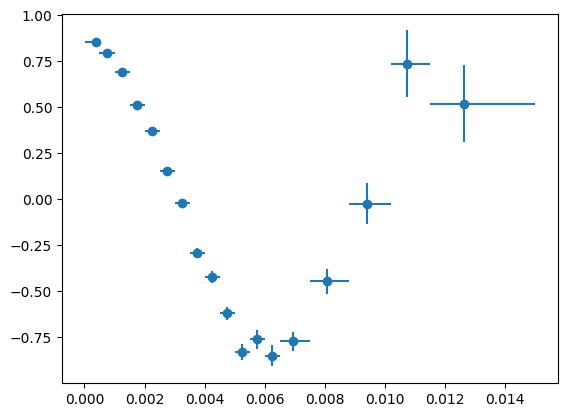

In [17]:

# This is a suggested binning for asymmetry plot. It is is in pico-seconds,
# so needs to be converted to nano-seconds.
tbins = np.array([0.002,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.5,8.8,10.2,11.5,15.])
tbins = tbins/1000.

# Compute the per-event value of q_prod*q_decay*(1-2eta)
#qDecay = np.where(pid<0,-1,+1)
#qD = q*(1-2*eta)*qDecay

# Compute the sums needed to get the asymmetry and it variance.
#wqDsum, bin_edges  = np.histogram(decaytime,bins=tbins,weights=sweights_B0*qD)
#wqD2sum, bin_edges = np.histogram(decaytime,bins=tbins,weights=sweights_B0*qD*qD)
#w2qD2sum, bin_edges = np.histogram(decaytime,bins=tbins,weights=sweights_B0*sweights_B0*qD*qD)
#asymmetry    = wqDsum / wqD2sum
#asymmetryerr = np.sqrt(w2qD2sum) / wqD2sum

# compute in every bin the average decay time
#wtsum, bin_edges = np.histogram(decaytime,bins=tbins,weights=sweights_B0*decaytime)
#wsum,  bin_edges = np.histogram(decaytime,bins=tbins,weights=sweights_B0)
#avtime = wtsum / wsum

# now draw points with error bars
#xerrors = [avtime-bin_edges[:-1],bin_edges[1:]-avtime]
#plt.errorbar(x=avtime, y=asymmetry, xerr=xerrors, yerr=asymmetryerr,fmt='o')
#plt.show()



# Fit the asymmetry

The theoretical model for the mixing asymmetry is

$A = \tfrac{1}{2} \: (1 + \cos(\Delta m\: t))$

However, there is a small experimental problem left: The output of the tagging algorithm is not very well calibrated. Therefore, we need to take into account that the amplitude is wrong by a *dilution scale factor* which we call $f_D$. We will need $f_D$ when we measure $\sin(2\beta)$ tomorrow.

Fit the asymmetry to the model
$A^\text{obs} = \tfrac{f_D}{2} \: (1 + \cos(\Delta m\: t))$

to extract the mixing frequency and the dilution scale factor.

How well does the value of $\Delta m$ agree with the PDG value?


FitResult of
<SimpleLoss model=[] data=[] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm     │ min value   │
╞═════════╪═════════════╪══════════════════╪═════════╪═════════════╡
│ True    │ True        │ False            │ 1.4e-06 │ 21.45081    │
╘═════════╧═════════════╧══════════════════╧═════════╧═════════════╛

Parameters
name      value  (rounded)        hesse    at limit
------  ------------------  -----------  ----------
A0                 0.85246  +/-  0.0069       False
DeltaM             506.173  +/-     3.3       False


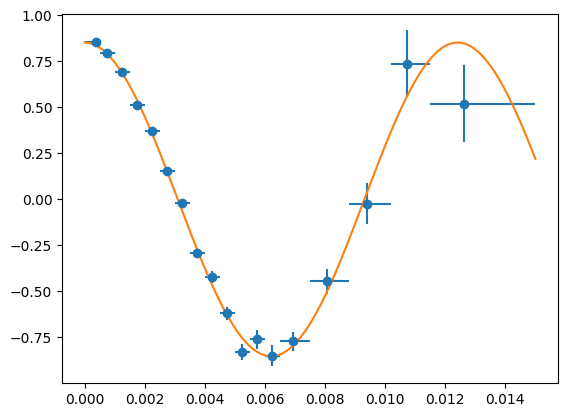

In [18]:
# The code below performs the fit to the binned asymmetry.
# You can also implement an unbinned fit: A solution is written in the solution
# workbook but I didn't yet get it to run on Google Colab.

zfit.core.parameter.ZfitParameterMixin._existing_params = OrderedDict()

# declare the parameters
#deltaM = zfit.Parameter("DeltaM",500,450,550,floating=True)
#A0 = zfit.Parameter("A0",1,0.5,1.5,floating=True)

# define a function that evaluates the chi2 using the asymmetry computed above
#def chi2( params ):
#  A0 = params[0]
#  dm = params[1]
#  cosdmt = np.cos(dm * avtime)
#  res = A0*cosdmt - asymmetry
#  var = np.square(asymmetryerr)
#  chi2 = np.sum( np.square(res)/var)
#  return chi2

# create a loss function and minimize it
#loss = zfit.loss.SimpleLoss(chi2, [A0,deltaM], errordef=1)
#result = minimizer.minimize(loss)
#result.hesse()
#print(result)

# draw the result
#plt.errorbar(x=avtime, y=asymmetry, xerr=xerrors, yerr=asymmetryerr,fmt='o')
#x = np.linspace(0,0.015, 1000)
#y = A0*np.cos(x*deltaM)
#plt.plot(x,y)
#plt.show()



# Perform an unbinned maximum likelihood fit

This doesn't quite work yet, although we managed to get it to work outside the notebook.

In [ ]:
import tensorflow as tf
class BMixingPDF(zfit.pdf.BasePDF):
    """ Generic decay PDF with mixing and CP violation"""
    def __init__(self,obs,A0,deltaM):
        self.A0 = A0
        self.deltaM = deltaM
        paramdict = { x.name : x for x in [A0,deltaM]}
        super().__init__(obs=obs, params=paramdict, name="MixingPDF")
    def _norm(): return 1
    def pdf(self, x):
      #tf.print(x)
      decaytime = x.unstack_x('decaytime')
      qD = x.unstack_x('qD')
      return (1 +  qD * self.A0 * tf.cos(self.deltaM*decaytime))

fitobs = zfit.Space("decaytime",(0.,0.015)) * zfit.Space("qD",(-2,2))
df["qD"] = qD
zdata = zfit.Data.from_pandas( df, obs=fitobs, weights=sweights_B0 )

pdf  = BMixingPDF(obs=fitobs,A0=A0,deltaM=deltaM)
nll_data = zfit.loss.UnbinnedNLL(model=pdf, data=zdata)
minimizer = zfit.minimize.Minuit()
result = minimizer.minimize(nll_data)
result.hesse()
print(result)



In [ ]:
# we can also do this with an unbinned fit if we define a proper model
import tensorflow as tf
class BMixingPDF(zfit.pdf.BasePDF):
    """ Generic decay PDF with mixing and CP violation"""
    def __init__(self,obs,A,deltaM):
        self.A = A
        self.deltaM = deltaM
        paramdict = { x.name : x for x in [A,deltaM]}
        super().__init__(obs=obs, params=paramdict, name="MixingPDF")

    def _norm(): return 1
    def _unnormalized_pdf(self, x):
      tf.print(x)
      print(x)
      decaytime = x.unstack_x('decaytime')
      qD = x.unstack_x('qD')
      tf.print(decaytime)
      tf.print(qD)
      tf.print(tf.cos(self.deltaM*decaytime))

      return 1 +  qD * self.A * tf.cos(self.deltaM*decaytime)
fitobs = zfit.Space("decaytime",(0.,0.015)) * zfit.Space("qD",(-2,2))
dfsel["qD"] = qD

#zdata = zfit.Data.from_pandas( dfsel, obs = fitobs, weights=sweights_B0 )
zdata = zfit.Data.from_pandas( dfsel, weights=sweights_B0 )
print(zdata['qD'].numpy())
pdf  = BMixingPDF(obs=fitobs,A=A,deltaM=deltaM)
nll_data = zfit.loss.ExtendedUnbinnedNLL(model=pdf, data=zdata)
result = minimizer.minimize(nll_data)
result.hesse()
print(result)

